In [15]:
#Fastenzeit Datum
FEATURES = [
    'Temperatur',
    'Windgeschwindigkeit',
    'KielerWoche',

    'WettercodeExtremwetter',
    'WettercodeKlar',
    'WettercodeNachSchlechtemWetter',
    'WettercodeNebel',
    'WettercodeRegen',
    'WettercodeSchnee',

    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread',

    'WochentagFreitag',
    'WochentagSamstag',
    'WochentagSonntag',
    'WochentagUnterDerWoche',

    'Januar',
    'Februar',
    'Maerz',
    'April',
    'Mai',
    'Juni',
    'Juli',
    'August',
    'September',
    'Oktober',
    'November',
    'Dezember',
    
    'BewoelkungWolkenBedeckt',
    'BewoelkungWolkenBewoelkt',
    'BewoelkungWolkenKlar',
    
    'FeiertagKeiner',
    'FeiertagChristiHimmelfahrt',
    'FeiertagErsterMai',
    'FeiertagOstermontag',
    'FeiertagPfingstmontag',
    'FeiertagTagDerDeutschenEinheit',

]



In [8]:
import pandas as pd

In [16]:
train_data = pd.read_csv('../0_DataPreparation/data/train_data_new.csv')
val_data = pd.read_csv('../0_DataPreparation/data/validation_data_new.csv')
test_data = pd.read_csv('../0_DataPreparation/data/test_data_new.csv')

X_train = train_data[FEATURES]
y_train = train_data['Umsatz']

X_val = val_data[FEATURES]
y_val = val_data['Umsatz']

X_test = test_data[FEATURES]


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

model.summary()


2026-01-04 10:42:08.821158: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-04 10:42:09.118918: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-04 10:42:28.998666: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-04 10:42:39.798724: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 192 (768.00 B)

In [19]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50


604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 55348.4805 - val_loss: 38187.9102
Epoch 2/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30431.9648 - val_loss: 17690.4277
Epoch 3/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13264.5488 - val_loss: 5976.5098
Epoch 4/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6184.3872 - val_loss: 2956.3801
Epoch 5/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4607.1484 - val_loss: 2983.0991
Epoch 6/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4371.4375 - val_loss: 3129.5090
Epoch 7/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4391.6685 - val_loss: 3051.6157
Epoch 8/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4271.4268 - val_loss: 3051.2456
Epoch 9/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4229.1030 - val_loss: 3034.6675
Epoch 10/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4344.4839 - val_loss: 2992.6814
Epoch 11/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4153.8833 - val_loss: 31

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Validation RMSE: {rmse:.2f}")


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation RMSE: 60.09


In [21]:
test_pred = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': test_pred.flatten()
})

submission.to_csv('../0_DataPreparation/data/submission_nn_01.csv', index=False)


 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


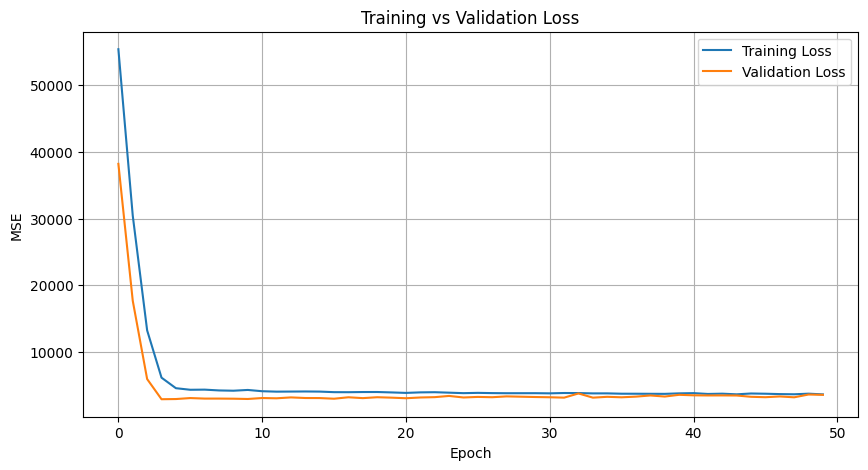

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import numpy as np

def mape(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

y_val_pred = model.predict(X_val_scaled)

val_mape = mape(y_val, y_val_pred)
print(f"Validation MAPE (overall): {val_mape:.2f}%")



297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation MAPE (overall): 22.79%


In [28]:
val_results = val_data.copy()
val_results['y_true'] = y_val.values
val_results['y_pred'] = model.predict(X_val_scaled).flatten()

for wg in [
    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread'
]:
    subset = val_results[val_results[wg] == 1]
    mape_wg = mape(subset['y_true'], subset['y_pred'])
    print(f"{wg}: {mape_wg:.2f}%")



297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


WarengruppeBread: 21.20%
WarengruppeRolls: 17.70%
WarengruppeCroissants: 22.37%
WarengruppeConfectionery: 25.55%
WarengruppeCake: 20.48%
WarengruppeSeasonalBread: 59.11%
